In [27]:
import datetime
import math
import os
import pickle
import re
import logging
from collections import Counter, OrderedDict, defaultdict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import torch
import pyro.distributions as dist
from pyro.ops.tensor_utils import convolve
from scipy.signal import savgol_filter

## World scale

In [444]:
df_counts_time = pd.read_csv('./data/4days_date.csv', header = 0)
time = pd.to_datetime(df_counts_time['date'], format='%Y-%m-%d')

lineages = torch.load('./data/Omicron_experimental_data_new.pkl')['lineages']
country = torch.load('./data/Omicron_experimental_data_new.pkl')['locations']

counts = torch.load('./data/Omicron_experimental_data_new.pkl')['counts'].sum(1)
counts = counts / (counts.sum(-1).unsqueeze(-1))

counts1 = counts.numpy()
counts = np.nan_to_num(counts1)

In [445]:
forecast_result_1 = torch.load('./data/forecast_world_noAE_41_reparam.pkl', map_location=torch.device('cpu')).squeeze(1)
forecast_result_2 = torch.load('./data/forecast_world_random_41_reparam.pkl', map_location=torch.device('cpu')).squeeze(1)
forecast_result_3 = torch.load('./data/forecast_world_noSite_41_reparam.pkl', map_location=torch.device('cpu')).squeeze(1)
forecast_result_4 = torch.load('./data/forecast_world_AE_43_reparam.pkl', map_location=torch.device('cpu')).squeeze(1)

In [446]:
def get_lineage_index(list):
    index = []
    for i in range(len(list)):
        index.append(lineages.index(list[i]))
    return index

## get counts & forecast data
def get_counts(lineage_index):
    df_counts = pd.DataFrame(counts[:, lineage_index])
    return df_counts

def get_forecast(lineage_index, forecast):
    df_forecast = pd.DataFrame(forecast[:,lineage_index].squeeze(1))
    return df_forecast

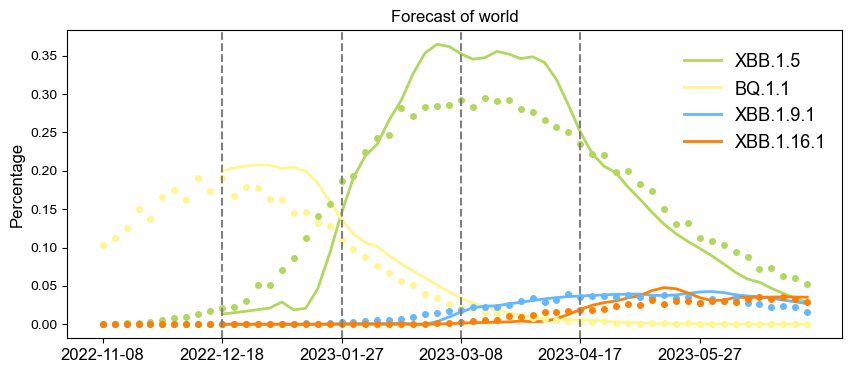

In [108]:
# plt.figure(figsize=(13,5))
plt.figure(figsize=(10,4))
plt.rcParams['font.sans-serif'] = ['Arial']
lineage = ['XBB.1.5','BQ.1.1', 'XBB.1.9.1', 'XBB.1.16.1']
colors = ['#b1d85c','#FFF68F', '#63B8FF', '#FF7F00']
s = 93
m,n = 103,153
for i in range(len(lineage)):
    plt.plot(time[:counts.shape[0]][s:m], get_counts(get_lineage_index(lineage))[s:m][i], color = colors[i], lw=0, marker='o', markersize=4)
    plt.plot(time[:counts.shape[0]][m:n], get_counts(get_lineage_index(lineage))[m:n][i], color = colors[i], lw=0, marker='o', markersize=4)
    plt.plot(time[:counts.shape[0]][m:n], savgol_filter(get_forecast(get_lineage_index(lineage), forecast_result_4)[m:n][i], 10, 5), color = colors[i], lw=2, zorder=-9, label = lineage[i])
    # plt.plot(time[:counts.shape[0]][m:n], savgol_filter(get_forecast(get_lineage_index(lineage), forecast_result_1)[m:n][i], 10, 5), color = colors[i], lw=2, zorder=-9, linestyle='--')
    # plt.plot(time[:counts.shape[0]][m:n], savgol_filter(get_forecast(get_lineage_index(lineage), forecast_result_2)[m:n][i], 10, 5), color = colors[i], lw=2, zorder=-9, linestyle='-.')
    # plt.plot(time[:counts.shape[0]][m:n], savgol_filter(get_forecast(get_lineage_index(lineage), forecast_result_3)[m:n][i], 10, 5), color = colors[i], lw=2, zorder=-9, linestyle=':')
    
    # plt.plot(time[:counts.shape[0]][m:n], get_forecast(get_lineage_index(lineage), forecast_result_4)[m:n][i], color = colors[i], lw=2, zorder=-9, label = lineage[i])
    # plt.plot(time[:counts.shape[0]][m:n], get_forecast(get_lineage_index(lineage), forecast_result_1)[m:n][i], color = colors[i], lw=2, zorder=-9, linestyle='--')
    # plt.plot(time[:counts.shape[0]][m:n], get_forecast(get_lineage_index(lineage), forecast_result_2)[m:n][i], color = colors[i], lw=2, zorder=-9, linestyle='-.')
    # plt.plot(time[:counts.shape[0]][m:n], get_forecast(get_lineage_index(lineage), forecast_result_3)[m:n][i], color = colors[i], lw=2, zorder=-9, linestyle=':')

# plt.xlabel('Time', fontsize=12)
plt.ylabel('Percentage', fontsize=12) 
# plt.legend(frameon=False, bbox_to_anchor=(1.165,1.0),borderaxespad = 0.)
plt.legend(frameon=False, bbox_to_anchor=(1,0.98), fontsize=13)
plt.axvline(x=time[m],linestyle='--', color='grey')
plt.axvline(x=time[m+10],linestyle='--', color='grey')
plt.axvline(x=time[m+20],linestyle='--', color='grey')
plt.axvline(x=time[m+30],linestyle='--', color='grey')
# plt.text(0.11, 0.92, 'Forecast of world',
#             fontsize = 14,
#             horizontalalignment='center',
#             verticalalignment='center', 
#             transform=plt.gca().transAxes,
#             bbox=dict(boxstyle='round,pad=0.6',facecolor='white',alpha=0.6)
            #    )
datetime_plot = []
string_plot = []
for i in range(n - s):
    if i % 10 == 0:
        datetime_plot.append(time[i + s])
        string_plot.append(time[i + s].strftime('%Y-%m-%d'))
plt.title('Forecast of world')
plt.xticks(datetime_plot, string_plot, fontsize=12)
plt.show()

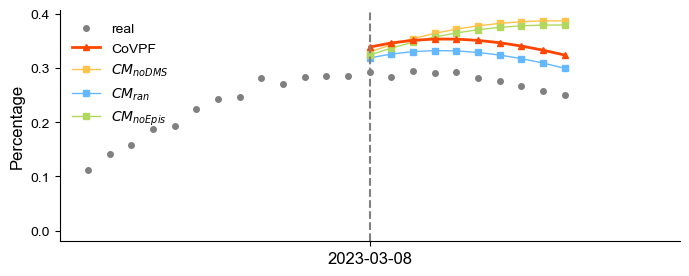

In [463]:
i=43
forecast_result_1 = torch.load('./data/forecast_world_noAE_reparam_'+str(i)+'.pkl', map_location=torch.device('cpu')).squeeze(1)
forecast_result_2 = torch.load('./data/forecast_world_random_reparam_'+str(i)+'.pkl', map_location=torch.device('cpu')).squeeze(1)
forecast_result_3 = torch.load('./data/forecast_world_noSite_reparam_'+str(i)+'.pkl', map_location=torch.device('cpu')).squeeze(1)
forecast_result_4 = torch.load('./data/forecast_world_AE_reparam_'+str(i)+'.pkl', map_location=torch.device('cpu')).squeeze(1)
# plt.figure(figsize=(13,5))

plt.figure(figsize=(8,3))
plt.rcParams['font.sans-serif'] = ['Arial']
lineage = ['XBB.1.5']
s = 110
m= 123
n=m+10
end = 137
plot=[]
for i in range(end-n):
    plot.append(0)
for i in range(len(lineage)):
    plt.plot(time[:counts.shape[0]][s:m], get_counts(get_lineage_index(lineage))[s:m][i], color = 'grey', lw=0, zorder=1, marker='o', markersize=4,label='real')
    plt.plot(time[:counts.shape[0]][m:n], get_counts(get_lineage_index(lineage))[m:n][i], color = 'grey', lw=0, zorder=1, marker='o', markersize=4)
    plus_AE = get_counts(get_lineage_index(lineage))[m-1:m][i].to_numpy() - get_forecast(get_lineage_index(lineage), forecast_result_4)[m:m+1][i].to_numpy()
    plus_noAE = get_counts(get_lineage_index(lineage))[m-1:m][i].to_numpy() - get_forecast(get_lineage_index(lineage), forecast_result_1)[m:m+1][i].to_numpy()
    plus_random = get_counts(get_lineage_index(lineage))[m-1:m][i].to_numpy() - get_forecast(get_lineage_index(lineage), forecast_result_2)[m:m+1][i].to_numpy()
    plus_noSite = get_counts(get_lineage_index(lineage))[m-1:m][i].to_numpy() - get_forecast(get_lineage_index(lineage), forecast_result_3)[m:m+1][i].to_numpy()
    plus_AE = 0
    plus_noAE = 0
    plus_random = 0
    plus_noSite = 0
    plt.plot(time[:counts.shape[0]][n:end], plot, color = 'white', lw=0, marker='o', markersize=4)
    plt.plot(time[:counts.shape[0]][m:n], get_forecast(get_lineage_index(lineage), forecast_result_4)[m:n][i]+plus_AE, color = '#FF4500', lw=2, zorder=1, label = 'CoVPF',marker='^', markersize=4)
    plt.plot(time[:counts.shape[0]][m:n], get_forecast(get_lineage_index(lineage), forecast_result_1)[m:n][i]+plus_noAE, color = '#FFC24B', lw=1, zorder=-9, label = '$CM_{noDMS}$',marker='s', markersize=4)
    plt.plot(time[:counts.shape[0]][m:n], get_forecast(get_lineage_index(lineage), forecast_result_2)[m:n][i]+plus_random, color = '#63B8FF', lw=1, zorder=-9, label = '$CM_{ran}$',marker='s', markersize=4)
    plt.plot(time[:counts.shape[0]][m:n], get_forecast(get_lineage_index(lineage), forecast_result_3)[m:n][i]+plus_noSite, color = '#b1d85c', lw=1, zorder=-9, label = '$CM_{noEpis}$',marker='s', markersize=4)
plt.ylabel('Percentage', fontsize=12) 
# plt.legend(frameon=False, bbox_to_anchor=(1.165,1.0),borderaxespad = 0.)
# plt.legend(frameon=False, loc='lower right', fontsize=13)
plt.axvline(x=time[m],linestyle='--', color='grey')
# plt.axvline(x=time[m+20],linestyle='--', color='grey')
# plt.axvline(x=time[m+30],linestyle='--', color='grey')
datetime_plot = []
string_plot = []
for i in range(n - m):
    if i % 10 == 0:
        datetime_plot.append(time[i + m])
        string_plot.append(time[i + m].strftime('%Y-%m-%d'))
plt.xticks(datetime_plot, string_plot, fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc='upper left', frameon=False)

In [8]:
### 113-133
counts = torch.load('./data/Omicron_experimental_data_new.pkl')['counts'].sum(1)
true = counts + 1e-20
count = true.sum(-1, True)
true_probs = counts / (counts.sum(-1).unsqueeze(-1)+1e-20)
def loss_cal(model): 
    pred = model

    # error = (pred - true_probs) * count**0.5  # scaled by Poisson stddev
    error = pred - true_probs
    mae = error.abs()  # average over time
    mse = error.square()  # average over time

    return error, mae, mse
cal_MAE_AE = loss_cal(forecast_result_4[:counts.shape[0]])[1]
cal_MSE_AE = loss_cal(forecast_result_4[:counts.shape[0]])[2]
cal_MAE_noAE = loss_cal(forecast_result_1[:counts.shape[0]])[1]
cal_MSE_noAE = loss_cal(forecast_result_1[:counts.shape[0]])[2]
cal_MAE_random = loss_cal(forecast_result_2[:counts.shape[0]])[1]
cal_MSE_random = loss_cal(forecast_result_2[:counts.shape[0]])[2]
cal_MAE_noSite = loss_cal(forecast_result_3[:counts.shape[0]])[1]
cal_MSE_noSite = loss_cal(forecast_result_3[:counts.shape[0]])[2]

lineage_index = lineages.index('XBB.1.5')
### MAE 20 bins
print('AE: MAE= '+str(cal_MAE_AE[:,lineage_index][113:133].mean()))
print('noAE: MAE= '+str(cal_MAE_noAE[:, lineage_index][113:133].mean()))
print('random: MAE= '+str(cal_MAE_random[:,lineage_index][113:133].mean()))
print('noSite: MAE= '+str(cal_MAE_noSite[:, lineage_index][113:133].mean()))
print('AE: MSE='+str(cal_MSE_AE[:,lineage_index][113:133].mean()))
print('noAE: MSE= '+str(cal_MSE_noAE[:, lineage_index][113:133].mean()))
print('random: MSE= '+str(cal_MSE_random[:,lineage_index][113:133].mean()))
print('noSite: MSE= '+str(cal_MSE_noSite[:, lineage_index][113:133].mean()))

AE: MAE= tensor(0.0512)
noAE: MAE= tensor(0.1057)
random: MAE= tensor(0.0488)
noSite: MAE= tensor(0.1034)
AE: MSE=tensor(0.0033)
noAE: MSE= tensor(0.0121)
random: MSE= tensor(0.0026)
noSite: MSE= tensor(0.0117)


## regional scale

In [569]:
df_counts_time = pd.read_csv('./data/4days_date.csv', header = 0)
time = pd.to_datetime(df_counts_time['date'], format='%Y-%m-%d')

lineages = torch.load('./data/Omicron_experimental_data_new.pkl')['lineages']
country = torch.load('./data/Omicron_experimental_data_new.pkl')['locations']

counts = torch.load('./data/Omicron_experimental_data_new.pkl')['counts']
counts = counts / (counts.sum(-1).unsqueeze(-1))

counts1 = counts.numpy()
counts = np.nan_to_num(counts1)

In [145]:
forecast_result_1 = torch.load('./data/10phase_noAE_41_new.pkl', map_location=torch.device('cpu'))
forecast_result_2 = torch.load('./data/10phase_random_41_new.pkl', map_location=torch.device('cpu'))
forecast_result_3 = torch.load('./data/10phase_noSite_41_new.pkl', map_location=torch.device('cpu'))
forecast_result_4 = torch.load('./data/10phase_AE_41_reparam.pkl', map_location=torch.device('cpu'))

In [570]:
def get_lineage_index(list):
    index = []
    for i in range(len(list)):
        index.append(lineages.index(list[i]))
    return index

## get counts & forecast data
def get_counts(country_index, lineage_index):
    df_counts = pd.DataFrame(counts[:, country_index, lineage_index])
    return df_counts

def get_forecast(country_index, lineage_index, forecast):
    df_forecast = pd.DataFrame(forecast[:, country_index, lineage_index].squeeze(1))
    return df_forecast

Text(0.5, 1.0, 'Forecast of USA')

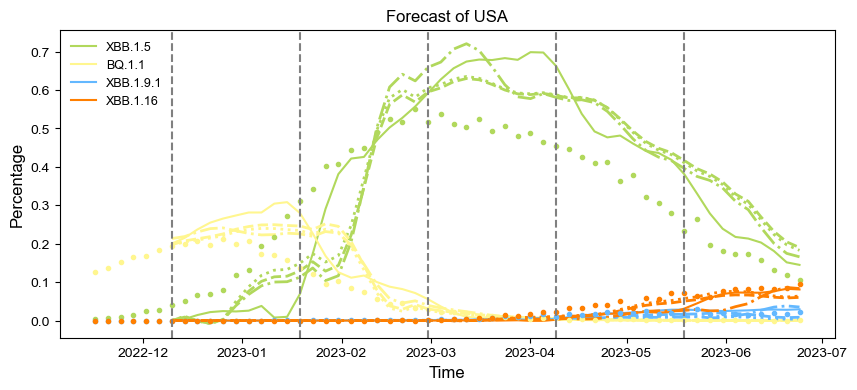

In [572]:
plt.figure(figsize=(10,4))
plt.rcParams['font.sans-serif'] = ['Arial']
country_index1 = country.index('USA')

# lineage = ['BA.2','BA.5.1']
lineage = ['XBB.1.5','BQ.1.1', 'XBB.1.9.1', 'XBB.1.16']
colors = ['#b1d85c','#FFF68F', '#63B8FF', '#FF7F00']
s = 95
m,n = 101,151
for i in range(len(lineage)):
    plt.plot(time[:counts.shape[0]][s:m], get_counts(country_index1, get_lineage_index(lineage))[s:m][i], color = colors[i], lw=0, marker='o', markersize=3)
    plt.plot(time[:counts.shape[0]][m:n], get_counts(country_index1, get_lineage_index(lineage))[m:n][i], color = colors[i], lw=0, marker='o', markersize=3)
    plt.plot(time[:counts.shape[0]][m:n], savgol_filter(get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[m:n][i], 10, 5), color = colors[i], lw=1.5, zorder=-9, label = lineage[i])
    plt.plot(time[:counts.shape[0]][m:n], savgol_filter(get_forecast(country_index1, get_lineage_index(lineage), forecast_result_1)[m:n][i], 10, 5), color = colors[i], lw=2, zorder=-9, linestyle='--')
    plt.plot(time[:counts.shape[0]][m:n], savgol_filter(get_forecast(country_index1, get_lineage_index(lineage), forecast_result_2)[m:n][i], 10, 5), color = colors[i], lw=2, zorder=-9, linestyle='-.')
    plt.plot(time[:counts.shape[0]][m:n], savgol_filter(get_forecast(country_index1, get_lineage_index(lineage), forecast_result_3)[m:n][i], 10, 5), color = colors[i], lw=2, zorder=-9, linestyle=':')
    # plt.plot(time[:counts.shape[0]][m:n], savgol_filter(get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[m:n][i], 50, 10), color = colors[i], lw=2, zorder=-9, label = lineage[i])
    # plt.plot(time[:counts.shape[0]][m:n], savgol_filter(get_forecast(country_index1, get_lineage_index(lineage), forecast_result_1)[m:n][i], 50, 10), color = colors[i], lw=2, zorder=-9, linestyle='--')
    # plt.plot(time[:counts.shape[0]][m:n], savgol_filter(get_forecast(country_index1, get_lineage_index(lineage), forecast_result_2)[m:n][i], 50, 10), color = colors[i], lw=2, zorder=-9, linestyle='-.')
    # plt.plot(time[:counts.shape[0]][m:n], savgol_filter(get_forecast(country_index1, get_lineage_index(lineage), forecast_result_3)[m:n][i], 50, 10), color = colors[i], lw=2, zorder=-9, linestyle=':')

plt.xlabel('Time', fontsize=12) 
plt.ylabel('Percentage', fontsize=12) 
# plt.legend(frameon=False, bbox_to_anchor=(1.165,1.0),borderaxespad = 0.)
plt.legend(frameon=False, loc='upper left', fontsize=9)
plt.axvline(x=time[m],linestyle='--', color='grey')
plt.axvline(x=time[m+10],linestyle='--', color='grey')
plt.axvline(x=time[m+20],linestyle='--', color='grey')
plt.axvline(x=time[m+30],linestyle='--', color='grey')
plt.axvline(x=time[m+40],linestyle='--', color='grey')
plt.title('Forecast of '+country[country_index1])

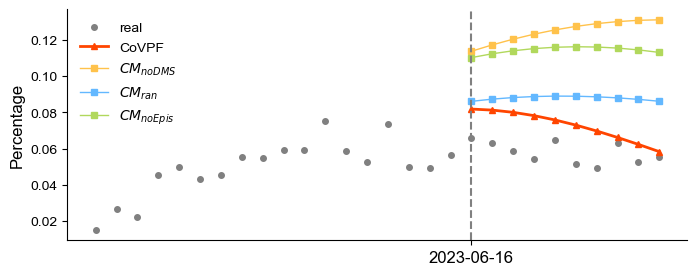

In [443]:
i=38
forecast_result_1 = torch.load('./data/10phase_noAE_new_'+str(i)+'.pkl', map_location=torch.device('cpu'))
forecast_result_2 = torch.load('./data/10phase_random_new_'+str(i)+'.pkl', map_location=torch.device('cpu'))
forecast_result_3 = torch.load('./data/10phase_noSite_new_'+str(i)+'.pkl', map_location=torch.device('cpu'))
forecast_result_4 = torch.load('./data/10phase_AE_reparam_'+str(i)+'.pkl', map_location=torch.device('cpu'))
# plt.figure(figsize=(13,5))
country_index1 = country.index('SouthKorea')
plt.figure(figsize=(8,3))
plt.rcParams['font.sans-serif'] = ['Arial']
lineage = ['XBB.1.16']
s = 130
m= 148
n=m+10
end = 158
plot=[]
for i in range(end-n):
    plot.append(0)
for i in range(len(lineage)):
    plt.plot(time[:counts.shape[0]][s:m], get_counts(country_index1, get_lineage_index(lineage))[s:m][i], color = 'grey', lw=0, zorder=1, marker='o', markersize=4,label='real')
    plt.plot(time[:counts.shape[0]][m:n], get_counts(country_index1, get_lineage_index(lineage))[m:n][i], color = 'grey', lw=0, zorder=1, marker='o', markersize=4)
    plus_AE = get_counts(country_index1, get_lineage_index(lineage))[m-1:m][i].to_numpy() - get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[m:m+1][i].to_numpy()
    plus_noAE = get_counts(country_index1, get_lineage_index(lineage))[m-1:m][i].to_numpy() - get_forecast(country_index1, get_lineage_index(lineage), forecast_result_1)[m:m+1][i].to_numpy()
    plus_random = get_counts(country_index1, get_lineage_index(lineage))[m-1:m][i].to_numpy() - get_forecast(country_index1, get_lineage_index(lineage), forecast_result_2)[m:m+1][i].to_numpy()
    plus_noSite = get_counts(country_index1, get_lineage_index(lineage))[m-1:m][i].to_numpy() - get_forecast(country_index1, get_lineage_index(lineage), forecast_result_3)[m:m+1][i].to_numpy()
    plus_AE = 0
    plus_noAE = 0
    plus_random = 0
    plus_noSite = 0
    plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[m:n][i]+plus_AE, color = '#FF4500', lw=2, zorder=1, label = 'CoVPF',marker='^', markersize=4)
    plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index1, get_lineage_index(lineage), forecast_result_1)[m:n][i]+plus_noAE, color = '#FFC24B', lw=1, zorder=-9, label = '$CM_{noDMS}$',marker='s', markersize=4)
    plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index1, get_lineage_index(lineage), forecast_result_2)[m:n][i]+plus_random, color = '#63B8FF', lw=1, zorder=-9, label = '$CM_{ran}$',marker='s', markersize=4)
    plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index1, get_lineage_index(lineage), forecast_result_3)[m:n][i]+plus_noSite, color = '#b1d85c', lw=1, zorder=-9, label = '$CM_{noEpis}$',marker='s', markersize=4)
    plt.plot(time[:counts.shape[0]][n:end], plot, color = 'white', lw=0, marker='o', markersize=4)
# plt.xlabel('Time', fontsize=12)
plt.ylabel('Percentage', fontsize=12) 
# plt.legend(frameon=False, bbox_to_anchor=(1.165,1.0),borderaxespad = 0.)
# plt.legend(frameon=False, loc='lower right', fontsize=13)
plt.axvline(x=time[m],linestyle='--', color='grey')
# plt.axvline(x=time[m+20],linestyle='--', color='grey')
# plt.axvline(x=time[m+30],linestyle='--', color='grey')
datetime_plot = []
string_plot = []
for i in range(n - m):
    if i % 10 == 0:
        datetime_plot.append(time[i + m])
        string_plot.append(time[i + m].strftime('%Y-%m-%d'))
plt.xticks(datetime_plot, string_plot, fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc='upper left', frameon=False)

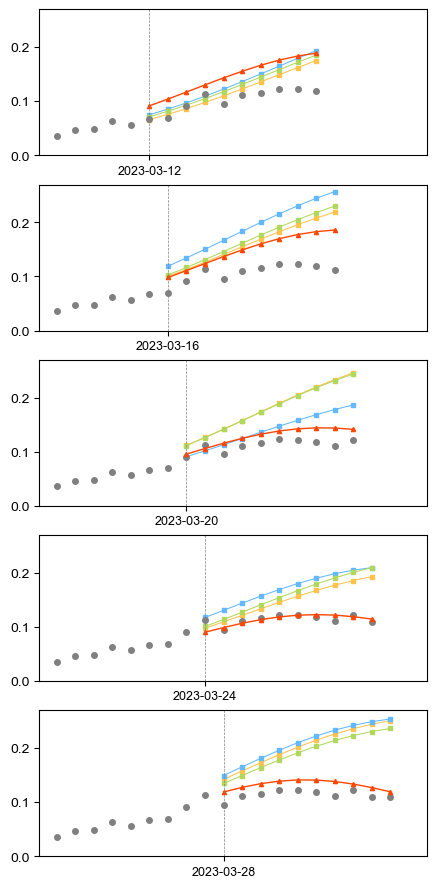

In [647]:
plt.figure(figsize=(5,11))
plt.rcParams['font.sans-serif'] = ['Arial']
country_index1 = country.index('SouthKorea')
lineage = ['XBB.1.5']

for j in range(5):
    k = 34+j
    m= 124+j
    n=m+10
    s = 119
    end= 139
    if k==32 or k==33 or k==31 or k==30:
        k=k+10
    plot=[]
    for i in range(end-n):
        plot.append(0)
    plt.subplot(5,1,j+1)
    forecast_result_1 = torch.load('./data/10phase_noAE_new_'+str(k)+'.pkl', map_location=torch.device('cpu'))
    forecast_result_2 = torch.load('./data/forecast_region_random/10phase_random_new_'+str(k)+'.pkl', map_location=torch.device('cpu'))
    forecast_result_3 = torch.load('./data/forecast_region_noSite/10phase_noSite_new_'+str(k)+'.pkl', map_location=torch.device('cpu'))
    forecast_result_4 = torch.load('./data/10phase_AE_reparam_'+str(k)+'.pkl', map_location=torch.device('cpu'))
    plt.plot(time[:counts.shape[0]][s:m], get_counts(country_index1, get_lineage_index(lineage))[s:m][0], color = 'grey', lw=0, zorder=1, marker='o', markersize=4,label='real')
    plt.plot(time[:counts.shape[0]][m:n], get_counts(country_index1, get_lineage_index(lineage))[m:n][0], color = 'grey', lw=0, zorder=1, marker='o', markersize=4)
    plus_AE = 0
    plus_noAE = 0
    plus_random = 0
    plus_noSite = 0
    plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[m:n][0]+plus_AE, color = '#FF4500', lw=1, zorder=1, label = 'CoVPF',marker='^', markersize=3)
    plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index1, get_lineage_index(lineage), forecast_result_1)[m:n][0]+plus_noAE, color = '#FFC24B', lw=0.75, zorder=-9, label = '$CM_{noDMS}$',marker='s', markersize=3)
    plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index1, get_lineage_index(lineage), forecast_result_2)[m:n][0]+plus_random, color = '#63B8FF', lw=0.75, zorder=-9, label = '$CM_{ran}$',marker='s', markersize=3)
    plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index1, get_lineage_index(lineage), forecast_result_3)[m:n][0]+plus_noSite, color = '#b1d85c', lw=0.75, zorder=-9, label = '$CM_{noEpis}$',marker='s', markersize=3)
    plt.plot(time[:counts.shape[0]][n:end], plot, color = 'white', lw=0, marker='o', markersize=4)
    plt.axvline(x=time[m],linestyle='--', color='grey',lw=0.5)
    datetime_plot = []
    string_plot = []
    for i in range(n - m):
        if i % 10 == 0:
            datetime_plot.append(time[i + m])
            string_plot.append(time[i + m].strftime('%Y-%m-%d'))
    plt.xticks(datetime_plot, string_plot, fontsize=9)
    # ax = plt.gca()
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    plt.ylim(0,0.27)

In [565]:
counts = torch.load('./data/Omicron_experimental_data_new.pkl')['counts']
true = counts + 1e-20
count = true.sum(-1, True)
true_probs = counts / (counts.sum(-1).unsqueeze(-1)+1e-20)
def loss_cal(model,country): 
    pred = model[:true_probs.shape[0],country,:]
    error = pred - true_probs[:,country,:]
    mae = error.abs()  # average over time
    mse = error.square()  # average over time
    return error, mae, mse
country_index1 = country.index('Japan')
lineage = ['XBB.1.5']
mae_AE = []
mae_noAE = []
mae_ran = []
mae_noSite = []
mse_AE = []
mse_noAE = []
mse_ran = []
mse_noSite = []
for j in range(5):
    k = 33+j
    m= 123+j
    n=m+10
    if k==33 or k==32:
        k=k+10
    forecast_result_1 = torch.load('./data/10phase_noAE_new_'+str(k)+'.pkl', map_location=torch.device('cpu'))
    forecast_result_2 = torch.load('./data/10phase_random_new_'+str(k)+'.pkl', map_location=torch.device('cpu'))
    forecast_result_3 = torch.load('./data/10phase_noSite_new_'+str(k)+'.pkl', map_location=torch.device('cpu'))
    forecast_result_4 = torch.load('./data/10phase_AE_reparam_'+str(k)+'.pkl', map_location=torch.device('cpu'))
    mae_AE.append(loss_cal(forecast_result_4,country_index1)[1][m:n,get_lineage_index(lineage)].sum())
    mae_noAE.append(loss_cal(forecast_result_1,country_index1)[1][m:n,get_lineage_index(lineage)].sum())
    mae_ran.append(loss_cal(forecast_result_2,country_index1)[1][m:n,get_lineage_index(lineage)].sum())
    mae_noSite.append(loss_cal(forecast_result_3,country_index1)[1][m:n,get_lineage_index(lineage)].sum())
    mse_AE.append(loss_cal(forecast_result_4,country_index1)[2][m:n,get_lineage_index(lineage)].sum())
    mse_noAE.append(loss_cal(forecast_result_1,country_index1)[2][m:n,get_lineage_index(lineage)].sum())
    mse_ran.append(loss_cal(forecast_result_2,country_index1)[2][m:n,get_lineage_index(lineage)].sum())
    mse_noSite.append(loss_cal(forecast_result_3,country_index1)[2][m:n,get_lineage_index(lineage)].sum())

In [566]:
print('MAE_AE = '+str(sum(mae_AE)))
print('MAE_noAE = '+str(sum(mae_noAE)))
print('MAE_ran = '+str(sum(mae_ran)))
print('MAE_noSite = '+str(sum(mae_noSite)))

MAE_AE = tensor(1.0946)
MAE_noAE = tensor(1.9324)
MAE_ran = tensor(1.5715)
MAE_noSite = tensor(1.5377)


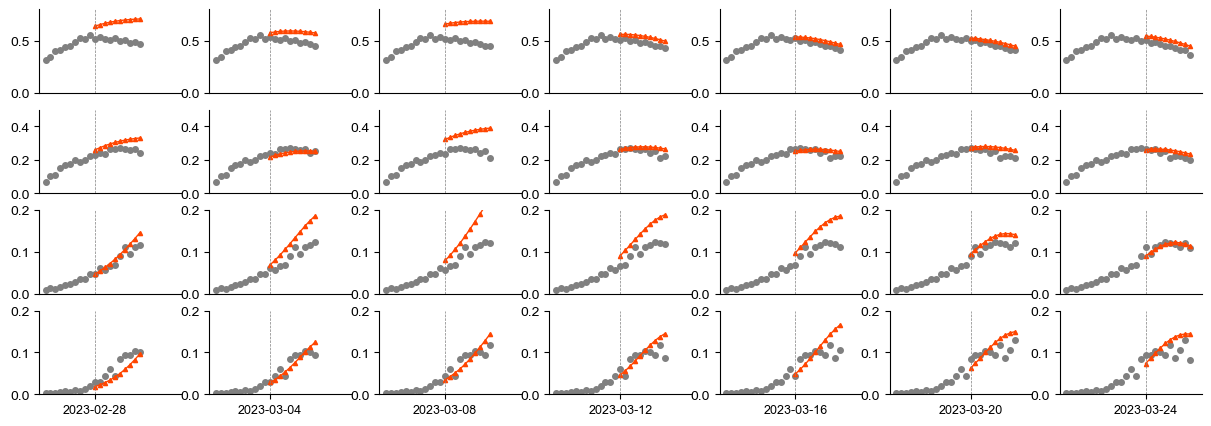

In [507]:
plt.figure(figsize=(15,5))
plt.rcParams['font.sans-serif'] = ['Arial']
country_index1 = country.index('USA')
country_index2 = country.index('UnitedKingdom')
country_index3 = country.index('SouthKorea')
country_index4 = country.index('Japan')
lineage = ['XBB.1.5']

for j in range(7):
    k = 31+j
    m= 121+j
    n=m+10
    s = 111
    end= 138
    if k==33 or k==32 or k==31:
        k=k+10
    plot=[]
    for i in range(end-n):
        plot.append(0)
    plt.subplot(4,7,j+1)
    forecast_result_4 = torch.load('/Users/leizhongyi/Code/pyro/fig4_code/forecast_region_AE/10phase_AE_reparam_'+str(k)+'.pkl', map_location=torch.device('cpu'))
    plt.plot(time[:counts.shape[0]][s:m], get_counts(country_index1, get_lineage_index(lineage))[s:m][0], color = 'grey', lw=0, zorder=1, marker='o', markersize=4,label='real')
    plt.plot(time[:counts.shape[0]][m:n], get_counts(country_index1, get_lineage_index(lineage))[m:n][0], color = 'grey', lw=0, zorder=1, marker='o', markersize=4)
    plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[m:n][0]+plus_AE, color = '#FF4500', lw=1, zorder=1, label = 'CoVPF',marker='^', markersize=3)
    plt.plot(time[:counts.shape[0]][n:end], plot, color = 'white', lw=0, marker='o', markersize=4)
    plt.axvline(x=time[m],linestyle='--', color='grey',lw=0.5)
    plt.xticks([])
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylim(0,0.8)

    plt.subplot(4,7,j+8)
    plt.plot(time[:counts.shape[0]][s:m], get_counts(country_index2, get_lineage_index(lineage))[s:m][0], color = 'grey', lw=0, zorder=1, marker='o', markersize=4,label='real')
    plt.plot(time[:counts.shape[0]][m:n], get_counts(country_index2, get_lineage_index(lineage))[m:n][0], color = 'grey', lw=0, zorder=1, marker='o', markersize=4)
    plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index2, get_lineage_index(lineage), forecast_result_4)[m:n][0]+plus_AE, color = '#FF4500', lw=1, zorder=1, label = 'CoVPF',marker='^', markersize=3)
    plt.plot(time[:counts.shape[0]][n:end], plot, color = 'white', lw=0, marker='o', markersize=4)
    plt.axvline(x=time[m],linestyle='--', color='grey',lw=0.5)
    plt.xticks([])
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylim(0,0.5)

    plt.subplot(4,7,j+15)
    plt.plot(time[:counts.shape[0]][s:m], get_counts(country_index3, get_lineage_index(lineage))[s:m][0], color = 'grey', lw=0, zorder=1, marker='o', markersize=4,label='real')
    plt.plot(time[:counts.shape[0]][m:n], get_counts(country_index3, get_lineage_index(lineage))[m:n][0], color = 'grey', lw=0, zorder=1, marker='o', markersize=4)
    plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index3, get_lineage_index(lineage), forecast_result_4)[m:n][0]+plus_AE, color = '#FF4500', lw=1, zorder=1, label = 'CoVPF',marker='^', markersize=3)
    plt.plot(time[:counts.shape[0]][n:end], plot, color = 'white', lw=0, marker='o', markersize=4)
    plt.axvline(x=time[m],linestyle='--', color='grey',lw=0.5)
    plt.xticks([])
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylim(0,0.2)

    plt.subplot(4,7,j+22)
    plt.plot(time[:counts.shape[0]][s:m], get_counts(country_index4, get_lineage_index(lineage))[s:m][0], color = 'grey', lw=0, zorder=1, marker='o', markersize=4,label='real')
    plt.plot(time[:counts.shape[0]][m:n], get_counts(country_index4, get_lineage_index(lineage))[m:n][0], color = 'grey', lw=0, zorder=1, marker='o', markersize=4)
    plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index4, get_lineage_index(lineage), forecast_result_4)[m:n][0]+plus_AE, color = '#FF4500', lw=1, zorder=1, label = 'CoVPF',marker='^', markersize=3)
    plt.plot(time[:counts.shape[0]][n:end], plot, color = 'white', lw=0, marker='o', markersize=4)
    plt.axvline(x=time[m],linestyle='--', color='grey',lw=0.5)
    datetime_plot = []
    string_plot = []
    for i in range(n - m):
        if i % 10 == 0:
            datetime_plot.append(time[i + m])
            string_plot.append(time[i + m].strftime('%Y-%m-%d'))
    plt.xticks(datetime_plot, string_plot, fontsize=9)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylim(0,0.2)